# Analysis of Car evaluation data set
source = UCI ML repository

A decision to buy a car or not, according to its physical attributes (as classes) is being discussed here.

Using the six features provided in the dataset, each car is being classified as either:
Unacceptable, Acceptable, Good or Very Good


In [85]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
import random
import seaborn as sns
from sklearn.metrics import classification_report

In [4]:
# Importing the data
car_data = pd.read_csv('car.data', names = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
car_data.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Data Exploration 

In [5]:
car_data.shape

(1728, 7)

In [6]:
car_data.describe()
# As we can see, all the columns have class 

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,big,high,unacc
freq,432,432,432,576,576,576,1210


In [7]:
car_data.isna().sum()
# No null values

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [8]:
# Or we can just use
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
# Since all the columns are categorical, checking for unique values of each column

for i in car_data.columns:
    print(("{:30} {:^10}").format(str(car_data[i].unique()), str(car_data[i].nunique())))

['vhigh' 'high' 'med' 'low']       4     
['vhigh' 'high' 'med' 'low']       4     
['2' '3' '4' '5more']              4     
['2' '4' 'more']                   3     
['small' 'med' 'big']              3     
['low' 'med' 'high']               3     
['unacc' 'acc' 'vgood' 'good']     4     


In [10]:
for i in car_data.columns:
    print(car_data[i].value_counts())
    
# Categories are equally distributed for all features except 'class'
# where 'unacc' (unacceptable) values are the largest

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64
3        432
2        432
4        432
5more    432
Name: doors, dtype: int64
more    576
2       576
4       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
high    576
med     576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


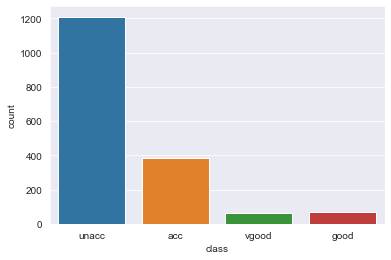

In [11]:
# let us visualize this unequal distribution in the feature 'class'
sns.set_style('darkgrid')
sns.countplot(car_data['class'])
 

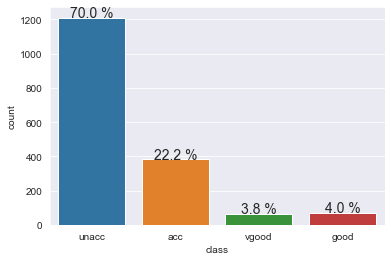

In [12]:
# let us visualize this unequal distribution in the feature 'class'
sns.set_style('darkgrid')
total = float(len(car_data))
ax = sns.countplot(car_data['class'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2, height + 3, "{:1.1f} %".format(height*100/total), ha = 'center', fontsize = 14)
plt.show()

 As seen, the classes occur with very different frequencies, hence this is an unbalanced multiclass classification problem.

## Here, 'class' will be our predictor variable/feature (that we want to predict)
Hence let us see how 'class' is distributed in each of the 6 input variables/feature

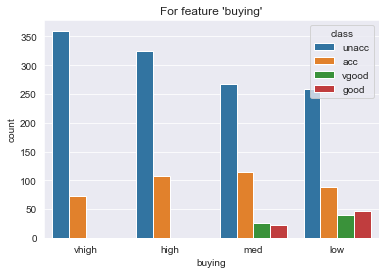

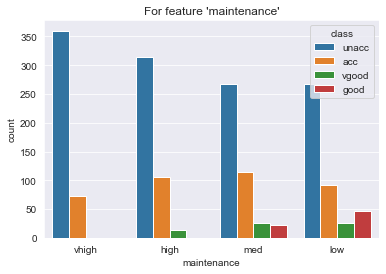

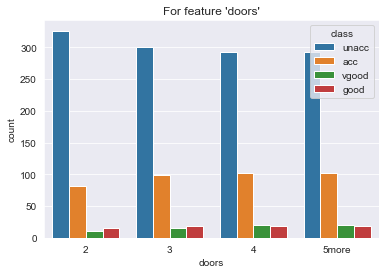

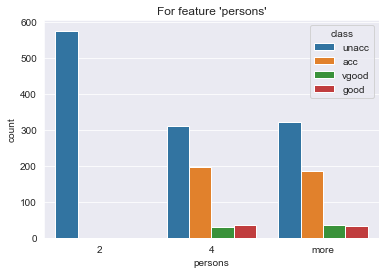

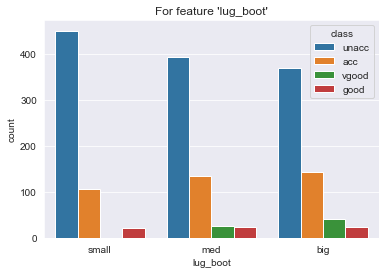

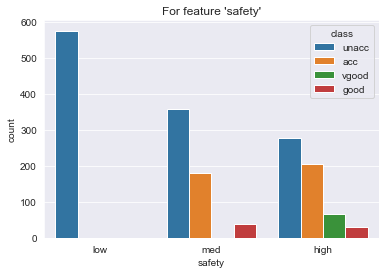

In [13]:
for i in car_data.columns[:-1]:
    plt.figure()
    plt.title("For feature '{}'".format(i))
    sns.countplot(car_data[i], hue = car_data['class'])
    
# The graphs tell us that cars with 2 person capacity or low safety are completely unacceptable to the buyers 

### Now let us check if any of the features are strongly correlated 

In [14]:
# for this we must convert all the category string data to category integer data
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

for i in car_data.columns:
    car_data[i] = le.fit_transform(car_data[i])

In [16]:
car_data.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


### Heatmap to show correlations between the features

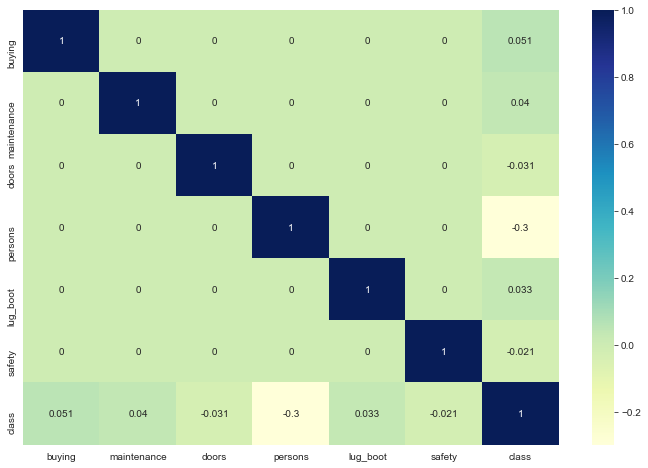

In [17]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(car_data.corr(), annot = True, cmap = "YlGnBu")

# As we see there is hardly any correlation between any individual input feature and 'class'

Thus, plotting any if these feature with another (ex: scatter plot) will not give any productive output

## Now let us use Decision Tree Classifier

to predict the possible class of a new car, based on its features

In [18]:
X = car_data.drop(['class'], axis = 1)
y = car_data['class']

In [19]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 243)

### Scaling the data 

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [21]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [22]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 243)

In [23]:
# fitting the model

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=243)

In [24]:
# testing the model, on the test set

y_pred_gini = clf_gini.predict(X_test)

In [25]:
# Checking the accuracy score

from sklearn.metrics import accuracy_score

print("The accuracy score of our model with gini index is:", round(accuracy_score(y_test, y_pred_gini), 3))

The accuracy score of our model with gini index is: 0.796


### Now let us check the amount of overfitting in our model

In [26]:
# for this we check the accuracy score for training data

y_pred_train_gini = clf_gini.predict(X_train)

In [27]:
print("The accuracy score of our training data with gini index is:", round(accuracy_score(y_train, y_pred_train_gini), 3))

The accuracy score of our training data with gini index is: 0.773


### Since our model has better accuracy score on test data(0.796) compared to training data(0.773), there is no question of overfitting

[Text(251.10000000000002, 380.52, 'X[3] <= -0.6\ngini = 0.457\nsamples = 1209\nvalue = [250, 57, 852, 50]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 411\nvalue = [0, 0, 411, 0]'),
 Text(334.8, 271.8, 'X[5] <= -0.619\ngini = 0.587\nsamples = 798\nvalue = [250, 57, 441, 50]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 0.876\ngini = 0.667\nsamples = 264\nvalue = [128, 25, 61, 50]'),
 Text(83.7, 54.360000000000014, 'gini = 0.651\nsamples = 196\nvalue = [99, 25, 22, 50]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.489\nsamples = 68\nvalue = [29, 0, 39, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 0.611\ngini = 0.438\nsamples = 534\nvalue = [122, 32, 380, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 264\nvalue = [0, 0, 264, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.597\nsamples = 270\nvalue = [122, 32, 116, 0]')]

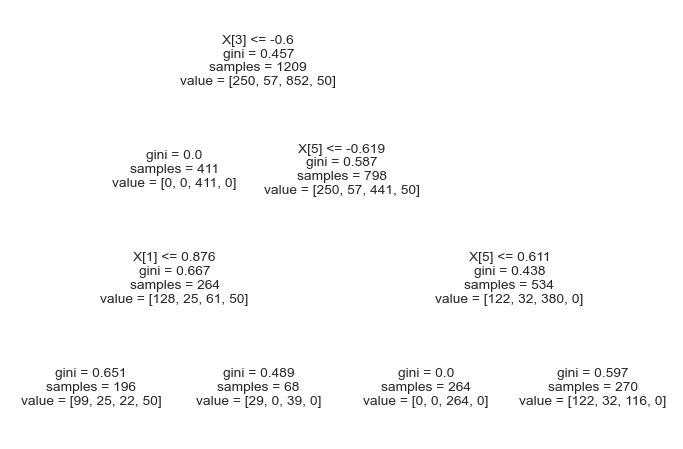

In [28]:
# Visualizing the decision tree
plt.figure(figsize = (12, 8))
from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

### Decision treee classifier with entropy criterion 

In [29]:
clf_en = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 243)

In [30]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=243)

In [31]:
y_pred_en = clf_en.predict(X_test)

In [32]:
print("The accuracy score of our model with entropy criterion is:", round(accuracy_score(y_test, y_pred_en), 3))

The accuracy score of our model with entropy criterion is: 0.796


In [33]:
# Comparing eith train data to check overfitting
y_pred_en_train = clf_en.predict(X_train)

In [34]:
print("The accuracy score of training data with entropy criterion is:", round(accuracy_score(y_train, y_pred_en_train), 3))

The accuracy score of training data with entropy criterion is: 0.773


### Hence even in case of entropy criterion there is no overfitting

### Note:
In both the criterions (Gini index and Entropy), the training-set and test-set accuracy score is

the same, this might have happen because of small dataset.

## Unsupervised approach
### Let us classify our features using KMeans

In [35]:
X = car_data
y = car_data.iloc[:, -1]

In [36]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 4, random_state = 243)

model.fit(X)

KMeans(n_clusters=4, random_state=243)

In [37]:
# Checking the 4 cluster centers, that are in 7d space

model.cluster_centers_

array([[0.625     , 1.5       , 2.625     , 1.        , 1.        ,
        1.        , 1.55092593],
       [2.375     , 2.625     , 1.5       , 1.        , 1.        ,
        1.        , 1.5162037 ],
       [0.625     , 1.5       , 0.375     , 1.        , 1.        ,
        1.        , 1.57638889],
       [2.375     , 0.375     , 1.5       , 1.        , 1.        ,
        1.        , 1.56944444]])

In [38]:
# Value of inertia for our centers, "(Within cluster sum of squares)"

model.inertia_

7750.162037037064

In [39]:
# Calculating the accuracy of our model

labels = model.labels_

correct_labels = sum(y == labels)

print("Result: {} out of {} samples are correctly labeled.".format(correct_labels, y.shape[0]))

Result: 413 out of 1728 samples are correctly labeled.


In [40]:
print("Hence the accuracy of our classification model is:", str(round(413/1728, 3)))

Hence the accuracy of our classification model is: 0.239


### We have achieved a weak classification accuracy of 23.9% through our unsupervised model 

### Let us check the relation of # clusters with Sum of Squared errors 

In [41]:
# Deciding the number of clusters in KMeans using an Elbow plot

def elbow_plot(n_clusters = 15, random_seed = 243):
    sse = {}
    for c in range(1, n_clusters):
        X = car_data.copy()
        model = KMeans(n_clusters = c, random_state = random_seed)
        model.fit(X)        
        sse[c] = model.inertia_
        
    plt.figure()
    plt.title('# clusters vs. inertia')
    plt.xlabel('# clusters')
    plt.ylabel('inertia/sum of squared errors')
    sns.lineplot(list(sse.keys()), list(sse.values()))
    plt.show()

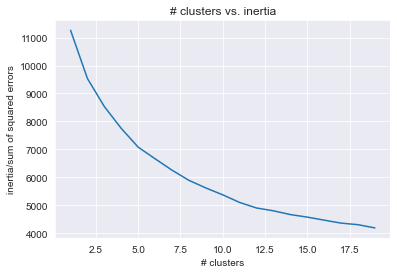

In [42]:
elbow_plot(n_clusters = 20)

### As we see our  '# clusters vs. inertia' plot has no elbow
### perhaps this is the reason we had such low accuracy

### Let us try increasing the # clusters to 6 

In [43]:

model2 = KMeans(n_clusters = 6, random_state = 243)

model2.fit(X)

KMeans(n_clusters=6, random_state=243)

In [44]:
# Checking the 2 cluster centers, that are in 7d space

model2.cluster_centers_

array([[1.38034188, 1.43589744, 1.50854701, 1.46153846, 1.11538462,
        0.        , 0.12820513],
       [2.55045872, 2.55045872, 1.47094801, 0.8440367 , 1.03669725,
        1.02140673, 2.03975535],
       [0.51020408, 0.5       , 1.46938776, 0.7755102 , 1.02040816,
        0.97959184, 2.08843537],
       [2.55045872, 0.44954128, 1.47094801, 0.8440367 , 1.03669725,
        1.02140673, 2.03975535],
       [0.44954128, 2.55045872, 1.47094801, 0.8440367 , 1.03669725,
        1.02140673, 2.03975535],
       [1.38812785, 1.34246575, 1.66210046, 1.50684932, 0.68493151,
        2.        , 0.17808219]])

In [45]:
# Value of inertia for our centers, "(Within cluster sum of squares)"

model2.inertia_

6664.314129686383

In [46]:
# Calculating the accuracy of our model

labels2 = model2.labels_

correct_labels2 = sum(y == labels2)

print("Result: {} out of {} samples are correctly labeled.".format(correct_labels2, y.shape[0]))

Result: 485 out of 1728 samples are correctly labeled.


In [47]:
print("Hence the accuracy of our classification model is:", str(round(485/1728, 3)))

Hence the accuracy of our classification model is: 0.281


### We did get a boost in the performance of our model 

#### n_clusters = 7 

In [48]:
from sklearn.cluster import KMeans

model3 = KMeans(n_clusters = 7, random_state = 243)

model3.fit(X)

KMeans(n_clusters=7, random_state=243)

In [49]:
# Checking the 2 cluster centers, that are in 7d space

model3.cluster_centers_

array([[1.40888889, 1.45333333, 1.54222222, 1.48      , 1.10222222,
        0.        , 0.10666667],
       [2.58441558, 2.58441558, 1.37662338, 0.8474026 , 1.04545455,
        1.03571429, 2.02922078],
       [0.75107296, 0.41630901, 0.61802575, 0.80686695, 1.03862661,
        0.99570815, 2.01287554],
       [2.66914498, 0.40520446, 1.57620818, 0.84758364, 1.04089219,
        1.03717472, 2.0260223 ],
       [0.44392523, 2.63551402, 0.78971963, 0.86915888, 1.04672897,
        1.03738318, 2.00934579],
       [1.40566038, 1.3490566 , 1.6745283 , 1.52358491, 0.68867925,
        2.        , 0.16037736],
       [0.72284644, 1.54681648, 2.73033708, 0.78277154, 0.99625468,
        0.94382022, 2.08614232]])

In [50]:
# Value of inertia for our centers, "(Within cluster sum of squares)"

model3.inertia_

6256.628620398548

In [51]:
# Calculating the accuracy of our model

labels3 = model3.labels_

correct_labels3 = sum(y == labels3)

print("Result: {} out of {} samples are correctly labeled.".format(correct_labels3, y.shape[0]))

Result: 417 out of 1728 samples are correctly labeled.


In [52]:
print("Hence the accuracy of our classification model is:", str(round(417/1728, 3)))

Hence the accuracy of our classification model is: 0.241


### Thus 6 is the optimal number of clusters for KMeans in our data 
### After 6 our model commences to overfit the data

#### n_clusters = 3 

In [53]:
from sklearn.cluster import KMeans

model4 = KMeans(n_clusters = 3, random_state = 243)

model4.fit(X)

KMeans(n_clusters=3, random_state=243)

In [54]:
# Checking the 4 cluster centers, that are in 7d space

model4.cluster_centers_

array([[2.66666667, 1.5       , 1.5       , 1.        , 1.        ,
        1.        , 1.64969136],
       [0.8       , 2.6       , 1.5       , 1.        , 1.        ,
        1.        , 1.54444444],
       [0.8       , 0.4       , 1.5       , 1.        , 1.        ,
        1.        , 1.4462963 ]])

In [55]:
# Value of inertia for our centers, "(Within cluster sum of squares)"

model4.inertia_

8530.855864197516

In [56]:
# Calculating the accuracy of our model

labels4 = model4.labels_

correct_labels4 = sum(y == labels4)

print("Result: {} out of {} samples are correctly labeled.".format(correct_labels4, y.shape[0]))

Result: 478 out of 1728 samples are correctly labeled.


In [57]:
print("Hence the accuracy of our classification model is:", str(round(478/1728, 3)))

Hence the accuracy of our classification model is: 0.277


#### n_clusters = 5 

In [58]:
from sklearn.cluster import KMeans

model5 = KMeans(n_clusters = 5, random_state = 243)

model5.fit(X)

KMeans(n_clusters=5, random_state=243)

In [59]:
# Checking the 4 cluster centers, that are in 7d space

model5.cluster_centers_

array([[0.38395415, 2.41547278, 1.37249284, 0.83667622, 1.05157593,
        1.04011461, 2.00859599],
       [1.37745098, 1.44362745, 1.6495098 , 1.51715686, 0.8872549 ,
        0.98529412, 0.08823529],
       [2.58441558, 2.58441558, 1.37662338, 0.8474026 , 1.04545455,
        1.03571429, 2.02922078],
       [1.65538462, 0.45230769, 0.42769231, 0.86461538, 1.04      ,
        0.99384615, 1.92923077],
       [1.66272189, 0.64201183, 2.59467456, 0.81360947, 1.00295858,
        0.94970414, 2.05621302]])

In [60]:
# Value of inertia for our centers, "(Within cluster sum of squares)"

model5.inertia_

7079.782412157208

In [61]:
# Calculating the accuracy of our model

labels5 = model5.labels_

correct_labels5 = sum(y == labels5)

print("Result: {} out of {} samples are correctly labeled.".format(correct_labels5, y.shape[0]))

Result: 351 out of 1728 samples are correctly labeled.


In [62]:
print("Hence the accuracy of our classification model is:", str(round(351/1728, 3)))

Hence the accuracy of our classification model is: 0.203


# Let us now try Logistic Regression 

In [63]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg = LogisticRegression(solver = 'newton-cg', multi_class = 'multinomial')

In [67]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [68]:
y_pred = logreg.predict(X_test)

In [71]:
print("The accuracy using logistic regression is", round(logreg.score(X_test, y_test), 3))

The accuracy using logistic regression is 0.686


#### Since the accuracy by simple logistic regression model is not very good, let us further optimize it

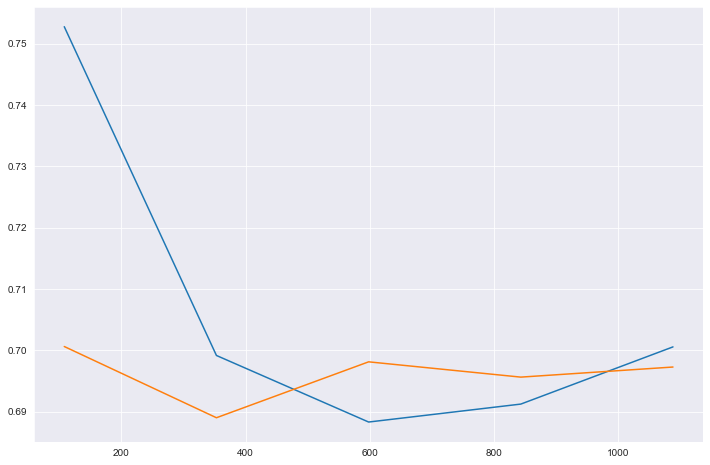

In [73]:
# First, we will plot learning curves for this

from sklearn.model_selection import learning_curve

lc = learning_curve(logreg, X_train, y_train, cv = 10, n_jobs = -1)
size = lc[0]
train_score = [lc[1][i].mean() for i in range(0, 5)]
test_score = [lc[2][i].mean() for i in range(0, 5)]
fig = plt.figure(figsize = (12, 8))
plt.plot(size, train_score)
plt.plot(size, test_score)

### The accuracy is decreasing with increase in sample size, hence we will have to first fine tune the parameters 

In [75]:
from sklearn.model_selection import validation_curve
param_range = [0.0001, 0.001, 0.01, 0.1, 1]
curve = validation_curve(logreg, X_train, y_train, cv = 5, param_name = 'C', param_range = param_range, n_jobs = -1)


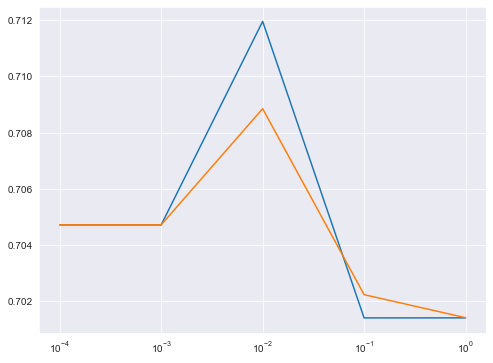

In [80]:
n = len(param_range)
train_score = [curve[0][i].mean() for i in range(0, n)]
test_score = [curve[1][i].mean() for i in range(0, n)]
plt.figure(figsize = (8, 6))
ax = plt.gca()
ax.plot(param_range, train_score)
ax.plot(param_range, test_score)
ax.set_xscale('log')
ax.xticks = param_range

#### Hence c = 0.01 is giving the best results

#### Since our data is small, we can try gridsearch here 

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [83]:
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [84]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.7088474332155962


#### So, with the above parameters, we were able to get at accuary of 71%. 

# Let us try KNN now 

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9248554913294798

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       134
           1       0.78      0.58      0.67        12
           2       0.96      0.96      0.96       358
           3       0.92      0.80      0.86        15

    accuracy                           0.92       519
   macro avg       0.88      0.80      0.84       519
weighted avg       0.92      0.92      0.92       519



#### Since accuracy can't be a fair criterion to evaluate unbalanced classification, we check the f1- score, 
#### f1- score = 0.92

#### Let us check for the best possible clusters in KNN 

In [93]:
from sklearn.model_selection import cross_val_score
scores = []
for k in range(2, 30):
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    score = cross_val_score(knn, X_train, y_train, cv = 5, n_jobs = -1, scoring = 'accuracy')
    scores.append(score.mean())
    

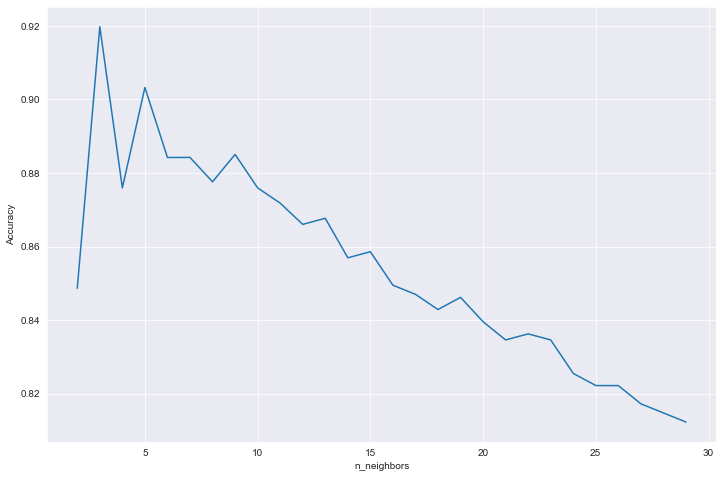

In [101]:
plt.figure(figsize = (12, 8))
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.plot(range(2, 30), scores)


#### So, n_neighbours=3 is giving the best accuracy, where f1-score = 0.92 for our data.

 

# Random Forest Classifier 

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_jobs = -1, random_state = 243)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [107]:
print("Accuracy =", rfc.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Accuracy = 0.9845857418111753
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       134
           1       1.00      1.00      1.00        12
           2       1.00      0.98      0.99       358
           3       0.94      1.00      0.97        15

    accuracy                           0.98       519
   macro avg       0.97      0.99      0.98       519
weighted avg       0.99      0.98      0.98       519



#### Hence, even the basic model of RFC is giving us: Accuracy = 98.5% and f1_score = 98%

### Now let us check the effect of n_estimators in the model 

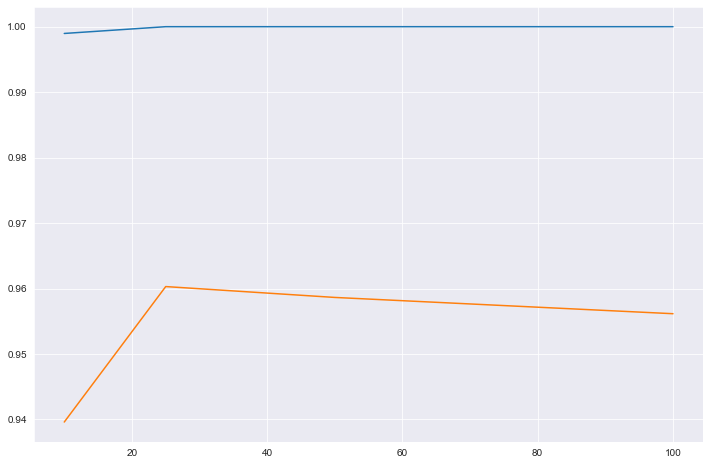

In [108]:
param_range = [10, 25, 50, 100]
curve = validation_curve(rfc, X_train, y_train, cv = 5, param_name = 'n_estimators', param_range = param_range, n_jobs = -1)

train_score = [curve[0][i].mean() for i in range(0, len(param_range))]
test_score = [curve[1][i].mean() for i in range(0, len(param_range))]
fig = plt.figure(figsize = (12, 8))
plt.plot(param_range, train_score)
plt.plot(param_range, test_score)
plt.xticks = param_range

#### Hence our model is evaluating the best accuracy at n_estimators=25. After that the model starts overfitting 

#### Since we have optimized for n_estimators, let us now optimize for max_features

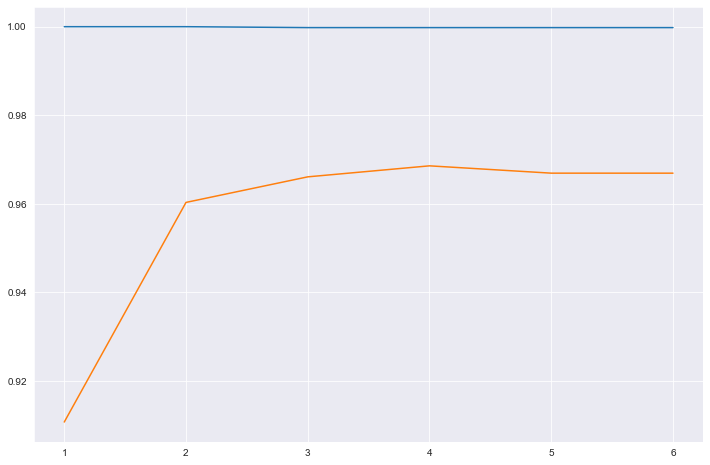

In [111]:
param_range = range(1, len(X.columns) + 1)
curve = curve = validation_curve(RandomForestClassifier(n_estimators = 25, n_jobs = -1, random_state = 243),\
                                 X_train, y_train, cv = 5, param_name = 'max_features', param_range = param_range, n_jobs = -1)

train_score = [curve[0][i].mean() for i in range(0, len(param_range))]
test_score = [curve[1][i].mean() for i in range(0, len(param_range))]
fig = plt.figure(figsize = (12, 8))
plt.plot(param_range, train_score)
plt.plot(param_range, test_score)
plt.xticks = param_range

#### Thus we get a peak at max_features = 4 (~0.97) and then our model starts to overfit 

#### We can also check other parameters like 'max_depth','criterion',etc using GridSearch, to get combination of best parameters
#### all together (Note: This is possible only because our dataset is small enough)

In [112]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [113]:

grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=25,n_jobs=-1,random_state=243), \
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [114]:
grid.fit(X_train,y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=25, n_jobs=-1,
                                              random_state=243),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [115]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 4, 'max_leaf_nodes': None}
0.9751997245179064


#### Learning Curve 

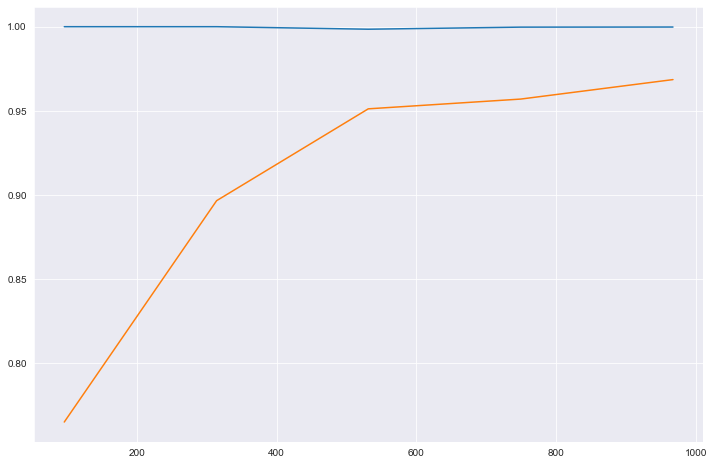

In [116]:
lc=learning_curve(RandomForestClassifier(n_estimators=25,criterion='gini',max_features=4,max_depth=20,random_state=243,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

### Model is overfitting as train accuracy is 1 and test accuracy is much less (well, relatively!).

### To reduce variance, we can either:-
#### 1) Increase number of samples.
#### 2) Reduce number of features 

In [117]:
print(X.columns)
print(rfc.feature_importances_)

Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')
[0.1896154  0.15859607 0.06916503 0.22259221 0.08966667 0.27036462]


#### 'Safety'  is the most important feature and
#### ' # of doors' is the least important feature (let us try removing this one)

In [121]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['buying', 'maintenance', 'persons', 'lug_boot', 'safety']],
    y, test_size=0.3, random_state=243)

In [123]:
rfc1 = RandomForestClassifier(n_estimators=25,criterion='gini',max_features=4,max_depth=20,random_state=243,\
                                             max_leaf_nodes=None,n_jobs=-1)
rfc1.fit(X_train1,y_train1)
rfc1.score(X_test1,y_test1)

0.9421965317919075

#### Hence, even after dropping the least important feature to decrease variance, our model accuracy did not increase.
#### We got stuck ar 94.21% accuracy, hence getting more data is the only option we have in this case.


# Conclusion 

### Of all the models we tried, Random Forest Classifier turned out to be the best one with 
### Highest Accuracy = 97.5%